## Introducción a Modelos de Series Temporales

### Definición de Series Temporales
Una serie temporal es una secuencia de puntos de datos medidos en intervalos temporales sucesivos. En el contexto del análisis financiero, las series temporales son cruciales porque permiten observar y analizar patrones de comportamiento a lo largo del tiempo, identificar tendencias y estacionalidades, y hacer proyecciones futuras basadas en datos históricos. Su importancia radica en la capacidad de utilizar los datos pasados para modelar y predecir fenómenos financieros, lo cual es fundamental para la toma de decisiones informadas en mercados dinámicos.

### Aplicaciones en Finanzas
Las series temporales se aplican extensivamente en el ámbito financiero de diversas maneras:
1. **Pronóstico de Mercados Financieros**: Utilizando modelos de series temporales, los analistas pueden predecir la dirección futura de los precios de activos financieros. Esto es fundamental para los traders y gestores de fondos en la maximización de ganancias y minimización de pérdidas.
2. **Análisis de Riesgo**: Las series temporales ayudan a estimar el riesgo de diferentes activos financieros. Al modelar la volatilidad de los precios y las correlaciones entre diferentes activos, los inversores pueden optimizar sus portafolios y gestionar el riesgo de manera más efectiva.
3. **Decisiones de Inversión**: Mediante el análisis de series temporales, los inversores pueden identificar ciclos económicos y tendencias de mercado que informan sus decisiones de inversión. Esto incluye la identificación de momentos óptimos para comprar o vender activos, o para diversificar inversiones.

### Ejemplo Introductorio en Python
A continuación se presenta un ejemplo básico de cómo visualizar una serie temporal de precios de acciones utilizando Python:

```python
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Descargar datos de acciones de Apple (AAPL)
datos = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Seleccionar solo el precio de cierre ajustado
precios = datos['Adj Close']

# Visualizar la serie temporal de precios
plt.figure(figsize=(10, 5))
plt.plot(precios, label='Precio de Cierre Ajustado')
plt.title('Serie Temporal de los Precios de Cierre Ajustados de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio USD')
plt.legend()
plt.show()
```


[*********************100%%**********************]  1 of 1 completed


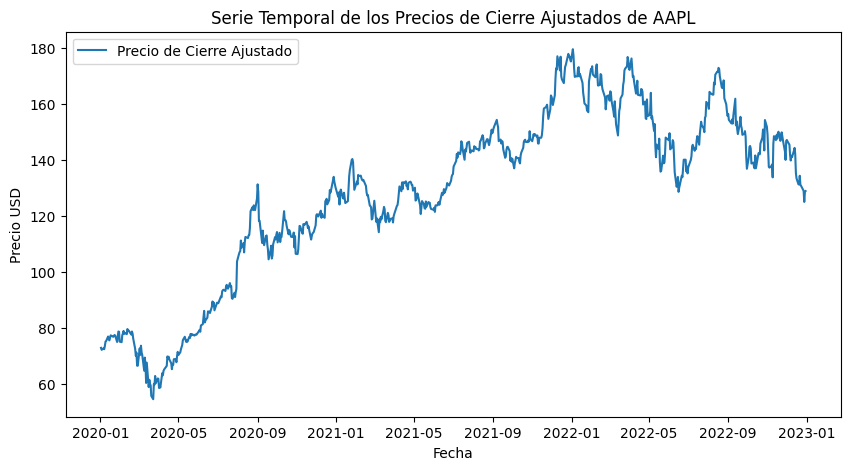

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Descargar datos de acciones de Apple (AAPL)
datos = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Seleccionar solo el precio de cierre ajustado
precios = datos['Adj Close']

# Visualizar la serie temporal de precios
plt.figure(figsize=(10, 5))
plt.plot(precios, label='Precio de Cierre Ajustado')
plt.title('Serie Temporal de los Precios de Cierre Ajustados de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio USD')
plt.legend()
plt.show()

## Modelado ARIMA para Pronóstico de Mercados

### Fundamentos de ARIMA
ARIMA, que significa Modelo Autoregresivo Integrado de Media Móvil, es un enfoque popular para el análisis y pronóstico de series temporales. El modelo ARIMA se compone de tres componentes principales:
- **AR (p) – Autoregresivo**: El componente autoregresivo en un modelo ARIMA representa la relación entre una observación y un número determinado de retardos (lagged observations) de sí misma. El parámetro 'p' define el número de términos autoregresivos.
- **I (d) – Integrado**: Este componente hace que la serie temporal sea estacionaria mediante la diferenciación de los datos un número específico de veces, denotado por 'd'.
- **MA (q) – Media Móvil**: El componente de media móvil modela el error de la predicción como una combinación lineal de errores de predicciones pasadas. El parámetro 'q' indica el número de términos de media móvil.

La aplicabilidad de ARIMA en datos financieros radica en su capacidad para modelar y predecir valores futuros basándose en la información de series temporales no estacionarias, lo que es común en datos financieros como precios de acciones o índices económicos.

### Selección de Parámetros y Diagnóstico
La selección de los parámetros p, d, q en un modelo ARIMA es crucial y se realiza en varias etapas:
1. **Determinación de la Estacionariedad**: Antes de ajustar un modelo ARIMA, es esencial verificar la estacionariedad de la serie temporal utilizando pruebas como la prueba de Dickey-Fuller aumentada (ADF). Una serie no estacionaria se puede transformar en estacionaria diferenciándola.
2. **Identificación de los Parámetros (p, q)**: Una vez estacionaria la serie, los parámetros p y q se pueden estimar observando las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF). El parámetro 'p' puede estimarse a partir de los picos significativos en la PACF, mientras que 'q' se puede identificar a partir de la ACF.
3. **Validación del Modelo**: El ajuste del modelo se puede diagnosticar revisando el gráfico de los residuos. Los residuos deben comportarse como ruido blanco (i.e., ser estacionarios y aproximadamente normales).


## Modelado Autoregresivo (AR)

El modelo Autoregresivo (AR) es una de las técnicas de modelado de series temporales más utilizadas y es fundamental para entender cómo se comportan las variables a lo largo del tiempo. En este modelo, se asume que el valor actual de la serie es una combinación lineal de sus valores anteriores más un término de error.

### Ecuación del Modelo AR

Un modelo AR(p) se puede expresar con la siguiente ecuación:

$$ X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \epsilon_t $$

donde:
- $X_t $es el valor actual de la serie temporal.
- $ c $ es una constante.
- $ \phi_1, \phi_2, \dots, \phi_p $ son los parámetros del modelo que necesitan ser estimados.
- $ p $ es el número de retardos.
- $ \epsilon_t $ es el término de error, que se asume es un ruido blanco.

### Estimación de Parámetros

La estimación de los parámetros del modelo AR se realiza comúnmente mediante el método de mínimos cuadrados ordinarios (OLS), buscando minimizar la suma de cuadrados de los errores.

### Diagnóstico del Modelo

Para validar un modelo AR, es esencial verificar:
- **Estacionariedad**: La serie debe ser estacionaria para que el modelo AR sea válido. Esto se puede comprobar mediante la prueba de Dickey-Fuller aumentada.
- **Autocorrelación de los Residuos**: Los residuos del modelo deberían comportarse como ruido blanco. Esto se puede verificar mediante la función de autocorrelación (ACF).

### Ejemplo Gráfico con Python

A continuación, se muestra cómo modelar y visualizar un modelo AR(2) usando Python:

```python
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Simulación de datos AR(2)
np.random.seed(42)
n = 1000
alpha1 = 0.666
alpha2 = -0.333
lags = 2
error = np.random.normal(0, 1, n)
time_series = np.zeros(n)

for t in range(lags, n):
    time_series[t] = alpha1 * time_series[t-1] + alpha2 * time_series[t-2] + error[t]

# Ajuste del modelo AR(2)
model = AutoReg(time_series, lags=2)
model_fit = model.fit()

# Gráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
# Serie temporal
ax1.plot(time_series)
ax1.set_title('Simulación de Serie Temporal AR(2)')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Valor')

# Función de Autocorrelación Parcial
plot_pacf(model_fit.resid, ax=ax2)
ax2.set_title('Autocorrelación Parcial de los Residuos')

plt.tight_layout()
plt.show()
```


## Modelo de Media Móvil (MA)

El Modelo de Media Móvil (MA, por sus siglas en inglés) es un componente clave en el modelado de series temporales, especialmente utilizado en la estructura de modelos ARIMA. Este modelo puede ayudar a entender y predecir las series temporales basándose en la relación entre un valor observado y el conjunto de errores de predicción pasados.

### Fundamentos del Modelo MA

En el modelo de media móvil, cada término de la serie temporal puede ser expresado como una función lineal de los términos de error pasados. Esto se puede representar matemáticamente de la siguiente manera:

$$ X_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q} $$

donde:
- $ X_t $ es el valor de la serie en el tiempo $ t $,
- $ \mu $ es la media de la serie,
- $ \epsilon_t $ es el término de error en el tiempo $ t $,
- $ \theta_1, \theta_2, \dots, \theta_q $ son los parámetros del modelo, y
- $ q $ es el orden del modelo MA, es decir, el número de términos de error que se consideran.

### Interpretación de los Parámetros

En un modelo MA, los parámetros $ \theta_1, \theta_2, \dots, \theta_q $ representan la magnitud y la influencia de los errores pasados en el valor actual de la serie. Si $ \theta $ es grande, entonces los errores pasados tienen un efecto significativo en el valor actual.

### Ejemplo Gráfico

Consideremos una serie temporal simple y apliquemos un modelo MA(1) para visualizar cómo el modelo se ajusta a los datos. A continuación, presentamos un código en Python que genera datos simulados y aplica un modelo MA(1):

```python
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess

# Parámetros del modelo MA(1)
theta = np.array([0.6])
arma_process = ArmaProcess(ma=theta)

# Generar datos simulados
np.random.seed(123)
simulated_data = arma_process.generate_sample(nsample=100)

# Visualización de los datos
plt.figure(figsize=(10, 5))
plt.plot(simulated_data, label='Datos Simulados')
plt.title('Simulación de un Modelo MA(1) con θ = 0.6')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()
```

Este ejemplo genera y visualiza una serie temporal que sigue un modelo MA(1) con un parámetro de $ \theta = 0.6 $. En este modelo, cada valor de la serie es influido principalmente por el error inmediato anterior, ajustado por el factor 0.6.



#3 Modelos GARCH

In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 4.7 MB/s eta 0:00:00


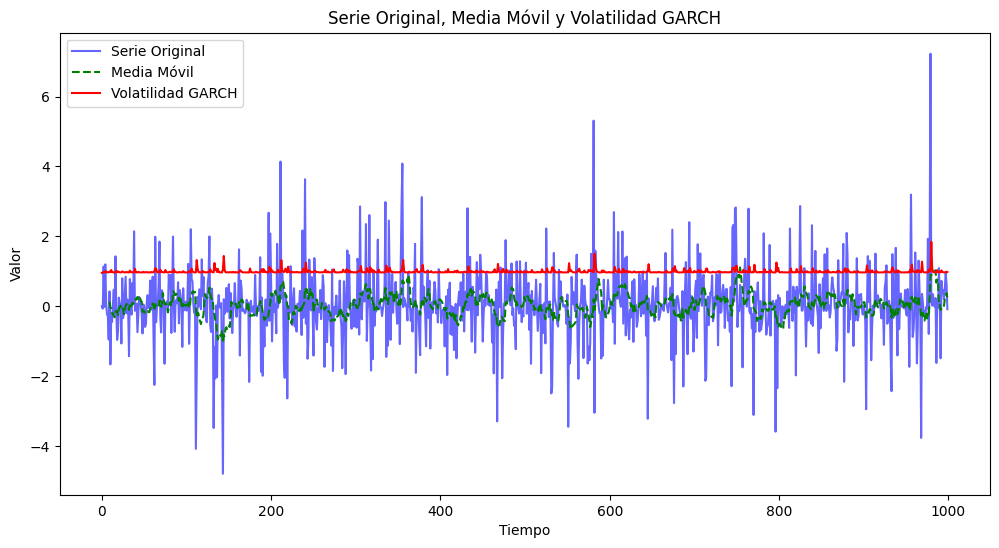

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from arch import arch_model

# Generar una serie de tiempo con acumulaciones de varianza
np.random.seed(42)
n = 1000
series = np.zeros(n)
sigma = np.zeros(n)
for t in range(1, n):
    sigma[t] = 0.2 * sigma[t-1] + np.random.normal()
    series[t] = np.random.normal(scale=np.abs(sigma[t]))

# Crear un DataFrame para organizar los datos
df = pd.DataFrame({'Series': series})

# Suavizado por media móvil
window_size = 10
df['Moving_Avg'] = df['Series'].rolling(window=window_size).mean()

# Ajuste del modelo GARCH
model = arch_model(df['Series'], vol='Garch', p=1, q=1)
garch_fit = model.fit(disp='off')
df['GARCH_Volatility'] = garch_fit.conditional_volatility

# Graficar las series
plt.figure(figsize=(12, 6))
plt.plot(df['Series'], label='Serie Original', color='blue', alpha=0.6)
plt.plot(df['Moving_Avg'], label='Media Móvil', color='green', linestyle='dashed')
plt.plot(df['GARCH_Volatility'], label='Volatilidad GARCH', color='red')
plt.legend()
plt.title('Serie Original, Media Móvil y Volatilidad GARCH')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.show()


## Historia de los Modelos GARCH

Los modelos GARCH (Generalized Autoregressive Conditional Heteroskedasticity) fueron introducidos por Robert Engle en 1982, y posteriormente generalizados por Tim Bollerslev en 1986. Estos modelos surgieron como una extensión de los modelos ARCH (Autoregressive Conditional Heteroskedasticity) propuestos por Engle, con el objetivo de modelar la volatilidad estocástica en series temporales financieras, donde las observaciones suelen presentar agrupaciones de volatilidad.

## Fundamentación Matemática de GARCH

Un modelo GARCH(p, q) puede describirse de la siguiente manera:

- **Ecuación de la Media**: $ y_t = \mu + \epsilon_t $
- **Ecuación de la Varianza Condicional**: $ \sigma_t^2 = \alpha_0 + \sum_{i=1}^p \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^q \beta_j \sigma_{t-j}^2 $

donde:
- $ \mu $ es la media de la serie.
- $ \epsilon_t $ son los residuos de la serie en el tiempo t.
- $ \sigma_t^2 $ es la varianza condicional (heteroskedasticidad).
- $ \alpha_0, \alpha_i, \beta_j $ son parámetros del modelo.

## Comparativo entre Modelos ARIMA y GARCH

| Característica        | ARIMA                         | GARCH                          |
|-----------------------|-------------------------------|--------------------------------|
| **Objetivo**          | Modelar y predecir valores    | Modelar y predecir volatilidad |
| **Componentes**       | Diferenciación, AR, MA        | AR, MA aplicados a la varianza |
| **Uso de la Varianza**| Constante a lo largo del tiempo | Cambia con el tiempo          |
| **Aplicación**        | Series temporales generales   | Series con volatilidad variable|

## Ejemplos de Aplicación en Finanzas

1. **Gestión de Riesgos**: Utilización de GARCH para estimar el Value at Risk (VaR) en carteras de inversión.
2. **Mercados de Derivados**: Modelado de la volatilidad implícita en opciones y futuros.
3. **Pronóstico de Volatilidad**: Pronóstico de cambios en la volatilidad de mercados financieros para estrategias de trading.

## Ejemplo Práctico: Uso de Datos Reales con Yahoo Finance

A continuación, se muestra un ejemplo práctico de cómo obtener datos de Yahoo Finance y aplicar un modelo GARCH para analizar la volatilidad de un activo financiero, como el índice S&P 500.

```python
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

# Descargar datos del S&P 500
data = yf.download('^GSPC', start='2020-01-01', end='2022-01-01')

# Calcular los retornos diarios
data['Returns'] = data['Close'].pct_change().dropna()

# Modelo GARCH(1,1)
model = arch_model(data['Returns'], vol='Garch', p=1, q=1)
model_fit = model.fit(disp='off')

# Graficar la volatilidad estimada
plt.figure(figsize=(10, 4))
plt.plot(model_fit.conditional_volatility)
plt.title('Volatilidad Estimada del S&P 500')
plt.show()


[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000269. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


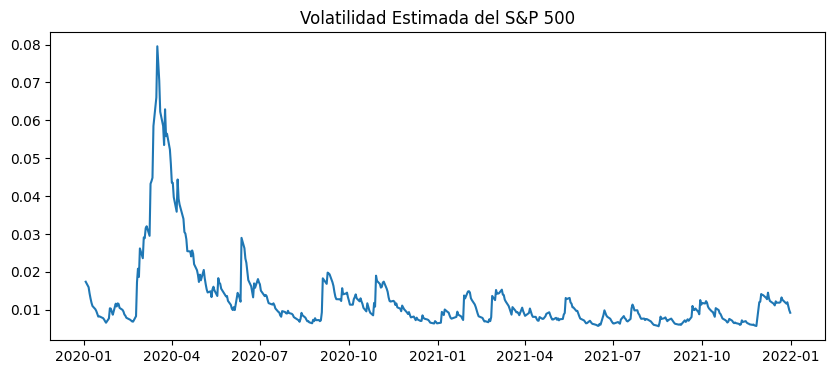

In [ ]:
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

# Descargar datos del S&P 500
data = yf.download('^GSPC', start='2020-01-01', end='2022-01-01')

# Calcular los retornos diarios y eliminar cualquier valor NaN
data['Returns'] = data['Close'].pct_change().dropna()

data = data.dropna()
# Verifica que no hay valores infinitos o NaN antes de continuar
if data['Returns'].isnull().any() or np.isinf(data['Returns']).any():
    print("La serie contiene valores NaN o infinitos.")
else:
    # Modelo GARCH(1,1)
    model = arch_model(data['Returns'], vol='Garch', p=1, q=1)
    model_fit = model.fit(disp='off')

    # Graficar la volatilidad estimada
    plt.figure(figsize=(10, 4))
    plt.plot(model_fit.conditional_volatility)
    plt.title('Volatilidad Estimada del S&P 500')
    plt.show()


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000,NaN
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000,-0.007060
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000,0.003533
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000,-0.002803
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000,0.004902
...,...,...,...,...,...,...,...
2021-12-27,4733.990234,4791.490234,4733.990234,4791.189941,4791.189941,2770290000,0.013839
2021-12-28,4795.490234,4807.020020,4780.040039,4786.350098,4786.350098,2707920000,-0.001010
2021-12-29,4788.640137,4804.060059,4778.080078,4793.060059,4793.060059,2963310000,0.001402


# Tipos de Volatilidad en Series Financieras

## Volatilidad Histórica (Clásica)

La volatilidad histórica, también conocida como volatilidad clásica, es una medida de la dispersión de los retornos de un activo financiero en un período histórico determinado. Se calcula como la desviación estándar de los retornos logarítmicos.

**Ecuación Matemática**:
$$ \text{Volatilidad Histórica} = \sigma = 100 \times \text{std}(R_i) $$

**Aplicación**: Esta volatilidad es ampliamente usada para modelar el riesgo en carteras de inversión y para la valoración de instrumentos derivados.

## Volatilidad Media Cero

La volatilidad media cero es una forma simplificada de calcular la volatilidad, donde se asume que la media de los retornos es cero. Esto permite enfocarse únicamente en la variabilidad de los retornos.

**Ecuación Matemática**:
$$ \text{Volatilidad Media Cero} = 100 \times \sqrt{\frac{\sum (R_i^2)}{n}} $$

**Aplicación**: Útil para cálculos rápidos y estimaciones donde la media de los retornos puede ser insignificante o desconocida.

## Volatilidad con Suavizamiento Exponencial (Tiempo $ t $)

Este tipo de volatilidad utiliza el suavizamiento exponencial para ponderar más fuertemente los retornos más recientes, utilizando un factor de descuento $ \lambda $.

**Ecuación Matemática**:
$$ \text{Volatilidad con Suavizamiento Exponencial en } t = 100 \times \sqrt{(1-\lambda) \times \sum (A_t)} $$
donde $ A_t = R_i^2 \times \lambda^{(i-1)} $

**Aplicación**: Utilizada en modelos de predicción de volatilidad que requieren ajustes rápidos a cambios recientes en la volatilidad del mercado.

## Volatilidad con Suavizamiento Exponencial (Tiempo $ t+1 $)

Estima la volatilidad en el siguiente período ($ t+1 $), incorporando el último retorno cuadrado junto con el valor suavizado hasta $ t $.

**Ecuación Matemática**:
$$ \text{Volatilidad con Suavizamiento Exponencial en } t+1 = 100 \times \sqrt{(1-\lambda) \times R_{\text{último}}^2 + \lambda \times \text{VAR}_{\text{último}}} $$

**Aplicación**: Especialmente útil para el cálculo de requerimientos de margen y para la gestión del riesgo de volatilidad en tiempo real.


In [ ]:
import yfinance as yahooFinance
import pandas as pd
import numpy as np
from scipy.optimize import minimize

def fetch_stock_data(ticker, period="5y"):
    stock = yahooFinance.Ticker(ticker)
    stock_history = stock.history(period=period)
    df = stock_history.reset_index()
    df = df[["Date", "Close"]]
    return df

def calculate_log_returns(df):
    df["R_i"] = np.log(df['Close']).diff(1)
    return df

def calculate_squared_returns(df):
    df['R_i_squared'] = df['R_i']**2
    return df

def add_inverse_index(df):
    df['i'] = range(len(df), 0, -1)
    return df

def apply_exponential_smoothing(df, lam):
    df['A'] = (df['R_i_squared'] * (lam ** (df['i'] - 1)))
    df['VAR'] = 0
    for row in range(1, len(df)):
        df.loc[row, 'VAR'] = (1 - lam) * df.loc[row, 'A'] + df.loc[row - 1, 'VAR']
    return df

def add_custom_column(df, lam):
    df['B'] = (df['R_i_squared'] - (lam * df['VAR'])) ** 2
    return df

def calculate_rmse_weight(df,weight=1000000):
    return np.sqrt(np.mean(df['B']))*weight

def calculate_rmse(df):
    return np.sqrt(np.mean(df['B']))

def optimize_lam(df, initial_lam=np.random.rand()):
    def rmse_lam(lam):
        if lam < 0 or lam > 1:
            return np.inf
        df_copy = df.copy()
        df_copy = apply_exponential_smoothing(df_copy, lam=lam[0])
        df_copy = add_custom_column(df_copy, lam=lam[0])
        return calculate_rmse_weight(df_copy)

    result = minimize(rmse_lam, [initial_lam], bounds=[(0, 1)])
    return result.x[0] if result.success else initial_lam

def calculate_volatilities(df, lam):
    apply_exponential_smoothing(df, lam)
    add_custom_column(df, lam)
    historical_volatility = 100 * df['R_i'].std()
    mean_zero_volatility = 100 * (df['R_i_squared'].sum() / len(df['R_i'])) ** 0.5
    exp_smoothing_volatility_t = 100 * ((1 - lam) * (df['A'].sum())) ** 0.5
    last_squared_return = df['R_i_squared'].iloc[-1]
    exp_smoothing_volatility_t1 = 100 * (((1 - lam) * last_squared_return + lam * (df['VAR'].iloc[-1])) ** 0.5)
    return historical_volatility, mean_zero_volatility, exp_smoothing_volatility_t, exp_smoothing_volatility_t1

# Execution flow
df = fetch_stock_data("AAPL")
# df = pd.read_excel("/content/Bombastic_Apple.xlsx")
df = calculate_log_returns(df)
df = calculate_squared_returns(df)
df = add_inverse_index(df)
volatilities = calculate_volatilities(df, lam=0.97)
print("Volatilities:", volatilities)
optimized_lam = optimize_lam(df)
df = apply_exponential_smoothing(df, optimized_lam)
df = add_custom_column(df, optimized_lam)
volatilities = calculate_volatilities(df, optimized_lam)

print("Optimized Lambda:", optimized_lam)
print("Volatilities:", volatilities)


Volatilities: (1.9960561095668017, 1.9978646053246891, 1.5024844031210067, 1.525000026878611)
Optimized Lambda: 0.9989878465727827
Volatilities: (1.9960561095668017, 1.9978646053246891, 1.5901068457602812, 1.5907436349398663)


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import minimize

def fetch_data(ticker, start_date, end_date):
    import yfinance as yf
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Close']

def calculate_log_returns(close_prices):
    return np.log(close_prices / close_prices.shift(1))

def calculate_ewma_volatility(returns, lambda_factor):
    weights = np.arange(len(returns)-1, -1, -1)
    weights = lambda_factor**weights
    weighted_squared_returns = (returns**2) * weights
    smoothed_variance = np.sum(weighted_squared_returns) * (1 - lambda_factor) / (1 - lambda_factor**len(returns))
    return np.sqrt(smoothed_variance)

def calculate_var_parametric(returns, investment_value, confidence_level, lambda_factor):
    z_score = norm.ppf(confidence_level)
    ewma_volatility_t1 = calculate_ewma_volatility(returns, lambda_factor)
    return -investment_value * z_score * ewma_volatility_t1

def calculate_var_non_parametric(returns, investment_value, confidence_level):
    sorted_returns = np.sort(returns)
    index = int((1 - confidence_level) * len(sorted_returns))
    return -investment_value * sorted_returns[index]

def simulate_monte_carlo(returns, investment_value, num_simulations, lambda_factor):
    simulated_returns = np.random.normal(np.mean(returns), calculate_ewma_volatility(returns, lambda_factor), num_simulations)
    sorted_simulated_returns = np.sort(simulated_returns)
    confidence_level_index = int(0.95 * num_simulations)
    return -investment_value * sorted_simulated_returns[confidence_level_index]

# Example usage
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-01-01'
investment_value = 20000000
confidence_level = 0.95
lambda_factor = 0.94

close_prices = fetch_data(ticker, start_date, end_date)
returns = calculate_log_returns(close_prices).dropna()

# Calculate VaR
var_parametric = calculate_var_parametric(returns, investment_value, confidence_level, lambda_factor)
var_non_parametric = calculate_var_non_parametric(returns, investment_value, confidence_level)
var_monte_carlo = simulate_monte_carlo(returns, investment_value, 10000, lambda_factor)

print("VaR Parametric:", var_parametric)
print("VaR Non-Parametric:", var_non_parametric)
print("VaR Monte Carlo:", var_monte_carlo)


[*********************100%%**********************]  1 of 1 completed

VaR Parametric: -551348.4152567703
VaR Non-Parametric: 684822.3315781849
VaR Monte Carlo: -578475.0034116347


# Análisis de Valor en Riesgo (VaR) Utilizando Diferentes Métodos

## Introducción

El Valor en Riesgo (VaR) es una métrica financiera que mide y cuantifica el nivel de riesgo financiero dentro de una firma o cartera durante un período específico. Este análisis se centra en tres métodos de cálculo del VaR:

1. **VaR Paramétrico**: Utiliza la distribución normal de los retornos y la volatilidad histórica para estimar el riesgo.
2. **VaR No Paramétrico**: Basa su cálculo en el ordenamiento de los retornos históricos, sin asumir una distribución específica.
3. **VaR Montecarlo**: Simula un gran número de escenarios de posibles resultados futuros basados en las distribuciones estadísticas de los retornos.

### Métodos y Aplicaciones

#### VaR Paramétrico

El VaR paramétrico se basa en la premisa de que los retornos de los activos siguen una distribución normal. Se calcula utilizando la media y la desviación estándar de los retornos, ajustados por un valor z correspondiente al nivel de confianza deseado.

**Ecuación Matemática**:
$$ \text{VaR} = -(\mu + z \times \sigma) \times \text{Inversión Total} $$
donde:
- $\mu $es la media de los retornos (usualmente asumida como valro cercano a cero para simplificar),
- $ \sigma $ es la desviación estándar de los retornos,
- $ z $ es el valor z de la distribución normal estándar para el nivel de confianza deseado.

**Aplicación**: Este método es adecuado para carteras grandes donde se requiere simplicidad y eficiencia computacional. Se utiliza ampliamente en la gestión del riesgo financiero y el cumplimiento regulatorio.

#### VaR No Paramétrico

El VaR no paramétrico se calcula directamente de la distribución histórica de los retornos sin asumir una forma funcional específica. Este método es efectivo para modelar distribuciones con colas pesadas o sesgos significativos.

**Ecuación Matemática**:
$$ \text{VaR} = -\text{quantil}_{(1-\text{nivel de confianza})}(\text{Retornos}) \times \text{Inversión Total} $$

**Aplicación**: Es utilizado cuando las características estadísticas de los datos históricos son importantes para la toma de decisiones de riesgo. Proporciona una medida más realista del riesgo en mercados volátiles o no estandarizados.

#### VaR Montecarlo

El método de Montecarlo utiliza simulaciones de los retornos de los activos basadas en sus propiedades estadísticas para construir una distribución de posibles resultados futuros y determinar el VaR.

**Ecuación Matemática**:
$$ \text{VaR} = -\text{quantil}_{(1-\text{nivel de confianza})}(\text{Retornos Simulados}) \times \text{Inversión Total} $$
donde los retornos simulados se generan a partir de la media y la volatilidad de los retornos históricos.

**Aplicación**: Es útil para analizar carteras complejas que incluyen una variedad de instrumentos financieros con interacciones y correlaciones complicadas. Este método es intensivo en computación pero proporciona una flexibilidad y un nivel de detalle que los métodos paramétrico y no paramétrico no pueden alcanzar.

## Resultados

- **VaR Paramétrico**: -$551,348.42
    - Indica que, bajo condiciones normales de mercado y con un 95% de confianza, se espera que la mayor pérdida no exceda $551,348.42 en un día.
    
- **VaR No Paramétrico**: $684,822.33
    - Sugiere que, basándose exclusivamente en los retornos históricos, la peor pérdida esperada en el 5% de los casos es de $684,822.33 en un día.
    
- **VaR Montecarlo**: -$578,475.00
    - Muestra que, según las simulaciones de posibles futuros retornos de mercado, la pérdida máxima esperada, con un 95% de confianza, es de $578,475.00 en un día.

## Interpretación de los Resultados

Los resultados muestran variaciones significativas entre los tres métodos, reflejando diferentes suposiciones y enfoques analíticos:

- El **VaR Paramétrico** y el **VaR Montecarlo** mostraron pérdidas máximas similares, lo que puede indicar que los supuestos sobre la normalidad de los datos no son tan desviados.
- El **VaR No Paramétrico**, sin embargo, indicó una posible pérdida mayor, lo que podría sugerir que los datos históricos incluyen eventos extremos que los modelos paramétricos y de simulación no capturan completamente.

Estas diferencias subrayan la importancia de seleccionar el método de VaR apropiado basado en la naturaleza de la cartera, la tolerancia al riesgo de la firma, y las características de los datos de mercado disponibles.


### Introducción a la Frontera Eficiente

#### Historia

El concepto de la Frontera Eficiente fue introducido por Harry Markowitz en 1952, como parte de su teoría de selección de carteras. Esta teoría forma la base de la moderna teoría de carteras y proporciona un marco matemático para el ensamblaje de una cartera de activos de tal manera que para un nivel dado de riesgo, se maximiza el retorno esperado. La Frontera Eficiente, o "frontera de Markowitz", ha revolucionado la forma en que los inversores piensan sobre el riesgo y el retorno.

#### Concepto Matemático de Dominancia

En términos de selección de carteras, un portafolio domina a otro si ofrece mayor retorno por el mismo nivel de riesgo o menos riesgo por el mismo nivel de retorno. La Frontera Eficiente consiste en el conjunto de todas las carteras posibles que no son dominadas por ninguna otra cartera en términos de retorno y riesgo. Matemáticamente, esto se traduce en optimizar la siguiente función para cada nivel de riesgo posible:

$$ \text{maximizar } \mu_p - \lambda \sigma_p^2 $$

donde:
- $ \mu_p $ es el retorno esperado de la cartera,
- $ \sigma_p^2 $ es la varianza (riesgo) de la cartera,
- $ \lambda $ es el parámetro de aversión al riesgo del inversor.

#### Ejemplo con 10 Acciones Usando YahooFinance y Cálculos en Python

A continuación, proporciono un ejemplo práctico donde seleccionamos 10 acciones, calculamos sus retornos esperados y varianzas, y construimos la frontera eficiente.


[*********************100%%**********************]  10 of 10 completed


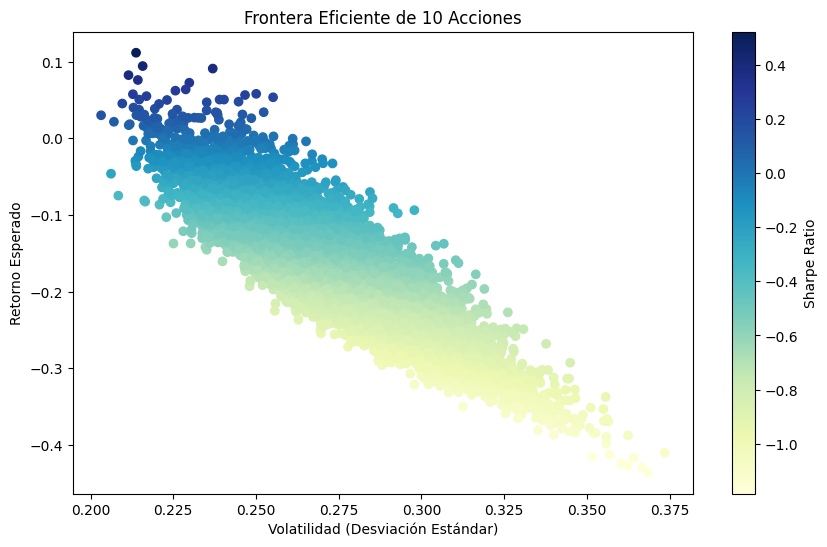

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Lista de acciones actualizada
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'META', 'BRK-B', 'JPM', 'V', 'JNJ', 'XOM']

# Descargar datos históricos
data = yf.download(tickers, start="2022-01-01", end="2023-01-01")['Adj Close']

# Verificar y manejar datos faltantes
if data.isnull().values.any():
    data = data.fillna(method='ffill')  # Llenar valores faltantes hacia adelante

# Calcular retornos diarios y manejar posibles datos faltantes después del llenado
returns = data.pct_change().dropna()

# Calcular retornos esperados y covarianza
mean_returns = returns.mean() * 252  # Asumiendo 252 días de trading al año
cov_matrix = returns.cov() * 252

# Simular carteras aleatorias
np.random.seed(42)
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    results[0, i] = portfolio_std_dev
    results[1, i] = portfolio_return
    results[2, i] = portfolio_return / portfolio_std_dev

# Graficar la frontera eficiente
plt.figure(figsize=(10, 6))
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='YlGnBu')
plt.colorbar(label='Sharpe Ratio')
plt.title('Frontera Eficiente de 10 Acciones')
plt.xlabel('Volatilidad (Desviación Estándar)')
plt.ylabel('Retorno Esperado')
plt.show()


### Conceptos Matemáticos para el Cálculo de Volatilidad y Retorno Esperado

En la gestión de inversiones y la teoría de carteras, los conceptos de volatilidad y retorno esperado son fundamentales para la evaluación y la optimización de carteras. A continuación, se detallan las bases matemáticas de estos conceptos y cómo se aplican en el contexto financiero.

#### Retorno Esperado

El retorno esperado de un activo financiero o una cartera es una estimación del promedio de los posibles retornos futuros del activo o cartera, ponderado por sus probabilidades. Matemáticamente, se calcula como el promedio ponderado de todos los posibles resultados, donde los pesos corresponden a la probabilidad de cada resultado.

**Fórmula para el Retorno Esperado de un Activo Individual**:
$$ E[R] = \sum_{i=1}^n p_i \cdot r_i $$
donde:
- $ E[R] $ es el retorno esperado.
- $ p_i $ es la probabilidad del i-ésimo retorno.
- $ r_i $ es el i-ésimo posible retorno.

En la práctica, cuando se utilizan datos históricos, el retorno esperado se suele calcular como el promedio aritmético de los retornos pasados:

$$ E[R] = \frac{1}{n} \sum_{i=1}^n r_i $$
donde $ r_i $ son los retornos históricos y $ n $ es el número de observaciones.

Para una cartera de activos, el retorno esperado es el promedio ponderado de los retornos esperados de los activos individuales, donde los pesos son las proporciones del valor total de la cartera invertidas en cada activo.

**Fórmula para el Retorno Esperado de una Cartera**:
$$ E[R_p] = \sum_{i=1}^k w_i \cdot E[R_i] $$
donde:
- $ E[R_p] $ es el retorno esperado de la cartera.
- $ w_i $ es la proporción del capital total invertido en el i-ésimo activo.
- $ E[R_i] $ es el retorno esperado del i-ésimo activo.

#### Volatilidad

La volatilidad es una medida estadística de la dispersión de los retornos para un activo o cartera de inversión. Representa el riesgo asociado a la inversión y se calcula generalmente como la desviación estándar de los retornos.

**Fórmula para la Volatilidad de un Activo Individual**:
$$ \sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (r_i - E[R])^2} $$
donde:
- $ \sigma $ es la volatilidad del activo.
- $ r_i $ son los retornos históricos.
- $ E[R] $ es el retorno esperado del activo.
- $ n $ es el número de observaciones.

Para una cartera de activos, la volatilidad no solo depende de la volatilidad de los activos individuales, sino también de la correlación entre los retornos de esos activos.

**Fórmula para la Volatilidad de una Cartera**:
$$ \sigma_p = \sqrt{\sum_{i=1}^k \sum_{j=1}^k w_i w_j \sigma_{ij}} $$
donde:
- $ \sigma_p $ es la volatilidad de la cartera.
- $ w_i $, $ w_j $ son las proporciones del capital total invertido en los activos i y j.
- $ \sigma_{ij} $ es la covarianza entre los retornos de los activos i y j.

Estas fórmulas forman la base para el análisis cuantitativo en la selección y gestión de carteras, permitiendo a los inversores hacer evaluaciones informadas sobre el compromiso entre riesgo y retorno.

[*********************100%%**********************]  10 of 10 completed


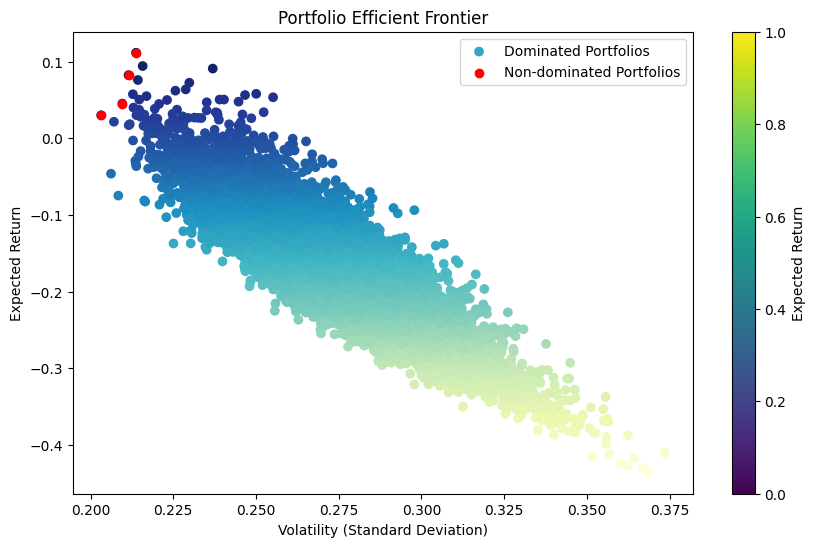

,Volatility,Return,Sharpe Ratio,AAPL,GOOGL,MSFT,AMZN,META,BRK-B,JPM,V,JNJ,XOM
0,0.203170,0.030021,0.147763,0.079261,0.010269,0.076637,0.081815,0.266945,0.190587,0.023984,0.039741,0.045699,0.185062
1,0.209579,0.045326,0.216271,0.002157,0.015741,0.219921,0.140978,0.216238,0.029625,0.007454,0.126631,0.040841,0.200415
2,0.211465,0.082386,0.389596,0.060715,0.016767,0.086434,0.050220,0.195673,0.064861,0.013654,0.012622,0.291632,0.207422
3,0.213740,0.111630,0.522267,0.076328,0.013970,0.058633,0.015595,0.158178,0.198020,0.015080,0.030542,0.163890,0.269764


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def identify_non_dominated_portfolios(volatilities, returns):
    # Ordenar las carteras por menor volatilidad
    indices = np.argsort(volatilities)
    sorted_volatilities = volatilities[indices]
    sorted_returns = returns[indices]

    # Lista para mantener los índices de las carteras no dominadas
    non_dominated_indices = []
    max_return_so_far = float('-inf')

    # Identificar carteras no dominadas
    for i in range(len(sorted_returns)):
        if sorted_returns[i] > max_return_so_far:
            non_dominated_indices.append(indices[i])
            max_return_so_far = sorted_returns[i]

    return np.array(non_dominated_indices)

def plot_portfolios(volatilities, returns, non_dominated_indices):
    plt.figure(figsize=(10, 6))
    plt.scatter(volatilities, returns, c=returns, cmap='YlGnBu', label='Dominated Portfolios')
    plt.scatter(volatilities[non_dominated_indices], returns[non_dominated_indices], c='red', label='Non-dominated Portfolios')
    plt.colorbar(label='Expected Return')
    plt.title('Portfolio Efficient Frontier')
    plt.xlabel('Volatility (Standard Deviation)')
    plt.ylabel('Expected Return')
    plt.legend()
    plt.show()

# Lista de acciones actualizada
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'META', 'BRK-B', 'JPM', 'V', 'JNJ', 'XOM']

# Descargar datos históricos
data = yf.download(tickers, start="2022-01-01", end="2023-01-01")['Adj Close']

# Verificar y manejar datos faltantes
if data.isnull().values.any():
    data = data.fillna(method='ffill')  # Llenar valores faltantes hacia adelante

# Calcular retornos diarios y manejar posibles datos faltantes después del llenado
returns = data.pct_change().dropna()

# Calcular retornos esperados y volatilidades tradicionales
mean_returns = returns.mean() * 252  # Asumiendo 252 días de trading al año
volatilities = returns.std() * np.sqrt(252)  # Volatilidades anuales

# Construir y evaluar carteras
num_portfolios = 10000
results = np.zeros((3 + len(tickers), num_portfolios))
np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    results[0, i] = portfolio_std_dev
    results[1, i] = portfolio_return
    results[2, i] = portfolio_return / portfolio_std_dev  # Ratio de Sharpe
    results[3:, i] = weights

# Identificar carteras no dominadas (frontera eficiente)
non_dominated_indices = identify_non_dominated_portfolios(results[0], results[1])

# Crear DataFrame con los resultados de las carteras no dominadas
columns = ['Volatility', 'Return', 'Sharpe Ratio'] + tickers
non_dominated_df = pd.DataFrame(results[:, non_dominated_indices].T, columns=columns)

# Graficar la frontera eficiente
plot_portfolios(results[0], results[1], non_dominated_indices)

# Devolver el DataFrame con las carteras no dominadas
non_dominated_df.head()


In [ ]:
pip install arch

[*********************100%%**********************]  10 of 10 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005029. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005928. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/

0.038789999485015866


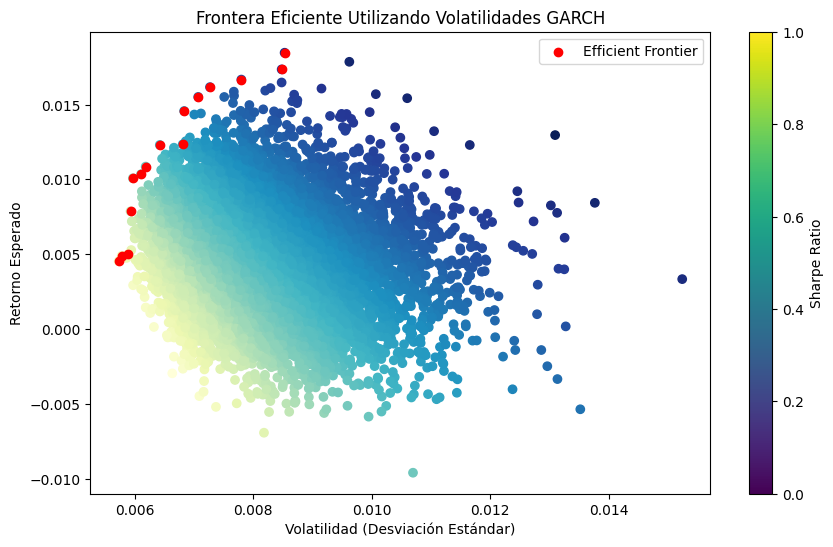

,Volatility,Return,Sharpe Ratio,AAPL,GOOGL,MSFT,AMZN,META,BRK-B,JPM,V,JNJ,XOM
0,0.005728,0.004537,-5.979830,0.066013,0.055604,0.115177,0.046782,0.029071,0.076822,0.124756,0.186161,0.229052,0.070561
1,0.005780,0.004895,-5.863970,0.070051,0.058147,0.012240,0.029218,0.029286,0.189611,0.169246,0.161701,0.209019,0.071480
2,0.005889,0.004984,-5.740675,0.050715,0.103724,0.059382,0.022327,0.037034,0.032564,0.215156,0.167887,0.213981,0.097231
3,0.005929,0.007865,-5.215503,0.107334,0.040258,0.077766,0.072208,0.025765,0.130314,0.181957,0.137118,0.196883,0.030396
4,0.005969,0.010074,-4.811221,0.067042,0.010156,0.087506,0.011439,0.042385,0.190804,0.223482,0.140378,0.180051,0.046756


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

# Lista de acciones actualizada
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'META', 'BRK-B', 'JPM', 'V', 'JNJ', 'XOM']

# Descargar datos históricos
data = yf.download(tickers, start="2022-01-01", end="2023-01-01")['Adj Close']

# Verificar y manejar datos faltantes
if data.isnull().values.any():
    data = data.fillna(method='ffill')  # Llenar valores faltantes hacia adelante

# Calcular retornos diarios y manejar posibles datos faltantes después del llenado
returns = data.pct_change().dropna()

# Ajustar un modelo GARCH para cada acción y estimar volatilidades futuras
volatilities = {}
for ticker in tickers:
    model = arch_model(returns[ticker], vol='Garch', p=1, q=1)
    res = model.fit(disp='off')
    volatilities[ticker] = res.forecast(horizon=1).variance.values[-1, :][0]**0.5

# Simular retornos futuros usando las volatilidades estimadas por GARCH
simulated_returns = {}
for ticker in tickers:
    mean_return = returns[ticker].mean()
    simulated_returns[ticker] = np.random.normal(mean_return, volatilities[ticker], 252)

# Descargar datos históricos del bono del Tesoro de EE. UU. a 10 años
ticker = "^TNX"
rate = yf.download(ticker, start="2022-01-01", end="2023-01-01")

# Extraer la última tasa disponible (rendimiento en porcentaje)
risk_free_rate = rate['Close'].iloc[-1] / 100
print(risk_free_rate)
# Construir y evaluar carteras
num_portfolios = 10000
results = np.zeros((3 + len(tickers), num_portfolios))
np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    portfolio_return = sum(weights[j] * simulated_returns[ticker][j] for j, ticker in enumerate(tickers))
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(np.cov(np.array([simulated_returns[ticker] for ticker in tickers])), weights)))
    results[0, i] = portfolio_std_dev
    results[1, i] = portfolio_return
    results[2, i] = (portfolio_return - risk_free_rate) / portfolio_std_dev  # Ratio de Sharpe
    results[3:, i] = weights

# Identificar carteras no dominadas (frontera eficiente)
def identify_non_dominated_portfolios(volatilities, returns):
    indices = np.argsort(volatilities)
    sorted_volatilities = volatilities[indices]
    sorted_returns = returns[indices]
    non_dominated_indices = []
    max_return_so_far = float('-inf')
    for i in range(len(sorted_returns)):
        if sorted_returns[i] > max_return_so_far:
            non_dominated_indices.append(indices[i])
            max_return_so_far = sorted_returns[i]
    return np.array(non_dominated_indices)

non_dominated_indices = identify_non_dominated_portfolios(results[0], results[1])

# Crear DataFrame con los resultados de las carteras no dominadas
columns = ['Volatility', 'Return', 'Sharpe Ratio'] + tickers
non_dominated_df = pd.DataFrame(results[:, non_dominated_indices].T, columns=columns)

# Graficar la frontera eficiente
plt.figure(figsize=(10, 6))
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.scatter(results[0, non_dominated_indices], results[1, non_dominated_indices], c='red', label='Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')
plt.title('Frontera Eficiente Utilizando Volatilidades GARCH')
plt.xlabel('Volatilidad (Desviación Estándar)')
plt.ylabel('Retorno Esperado')
plt.legend()
plt.show()

# Devolver el DataFrame con las carteras no dominadas
non_dominated_df.head()


El hecho de que el ratio de Sharpe sea negativo con el modelo GARCH y positivo con la varianza tradicional puede implicar varias cosas:

1. **Estimaciones de Volatilidad**:
    - **Modelo GARCH**: Este modelo captura la volatilidad dinámica y podría estar reflejando periodos recientes de alta volatilidad, lo que incrementa la estimación de riesgo (volatilidad). Un mayor denominador en la fórmula del ratio de Sharpe reduce el valor del ratio.
    - **Varianza Tradicional**: Calcula la volatilidad como la desviación estándar de los retornos históricos, que es una medida más estable y promedia la volatilidad a lo largo de todo el periodo. Esto puede resultar en una menor estimación de volatilidad si los periodos recientes no han sido particularmente volátiles.

2. **Retornos Ajustados al Riesgo**:
    - Un ratio de Sharpe negativo indica que el retorno esperado de la cartera es menor que la tasa libre de riesgo, ajustado por el riesgo. Esto sugiere que, según el modelo GARCH, la inversión no está siendo compensada adecuadamente por el riesgo asumido.
    - Un ratio de Sharpe positivo con la varianza tradicional sugiere que, en términos históricos, la inversión está proporcionando un retorno superior al de la tasa libre de riesgo, ajustado por la volatilidad histórica.

3. **Tasa Libre de Riesgo**:
    - Si la tasa libre de riesgo es significativamente alta y los retornos esperados de las carteras no son suficientes para superarla, esto puede contribuir a un ratio de Sharpe negativo.

4. **Sesgos en Datos Recientes**:
    - El modelo GARCH puede ser más sensible a los cambios recientes en la volatilidad y los retornos. Si los retornos recientes han sido bajos o negativos, esto puede resultar en un ratio de Sharpe negativo.

### Interpretación y Consideraciones

1. **Volatilidad Dinámica**: El modelo GARCH está diseñado para capturar la volatilidad que cambia con el tiempo. Si recientemente ha habido alta volatilidad, el modelo GARCH reflejará esto y podría mostrar un riesgo mayor, resultando en un ratio de Sharpe menor o negativo.

2. **Rendimiento Histórico vs. Dinámico**: La varianza tradicional asume que la volatilidad es constante a lo largo del tiempo y puede no capturar bien los periodos de alta volatilidad reciente. Esto puede hacer que las carteras parezcan menos riesgosas en comparación con las estimaciones del modelo GARCH.

3. **Evaluación del Riesgo**: Es importante considerar ambas estimaciones (varianza tradicional y GARCH) para una evaluación completa del riesgo. La volatilidad tradicional puede subestimar el riesgo en periodos de alta volatilidad reciente, mientras que el modelo GARCH puede proporcionar una visión más precisa del riesgo actual.

